In [65]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [66]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
from PIL import Image
import numpy as np
import nltk
from wordcloud import WordCloud
nltk.download('wordnet')
import nltk
import json
nltk.download("stopwords")
from nltk.corpus import stopwords

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [67]:
df = pd.read_csv('/content/drive/MyDrive/All_consolidated_and_little_further_processed.csv')
df.head()

,Id,title,time,keywords,data source,category,country,source URL,body,language
0,DR-2014-000109-CHN,Worst drought in 63 years hits Liaoning provin...,2014-08-14 07:00:00+00:00,"['averaged', 'liaoning', 'hits', 'dry', 'droug...",news article,drought,China,https://www.scmp.com/news/china/article/157349...,Liaoning averaged 90mm across the province in ...,English
1,DR-2014-000109-CHN,"In Time Of Drought, U.S. West's Alfalfa Export...",2014-08-12 07:00:00+00:00,"['criticized', 'river', 'drought', 'farmers', ...",news article,drought,China,https://www.npr.org/2014/08/12/339753108/in-ti...,"In Time Of Drought, U.S. West's Alfalfa Export...",English
2,DR-2014-000109-CHN,"More Chinese on the Coast, Less Fish in the Se...",2014-08-08 07:00:00+00:00,"['bertness', 'chinese', 'research', 'sea', 'ec...",news article,none,China,https://www.scientificamerican.com/article/mor...,China's booming economic growth is helping to ...,English
3,DR-2014-000109-CHN,Climate change and drought in ancient times - ...,2014-08-11 07:00:00+00:00,"['climate', 'drought', 'ancient', 'agriculture...",news article,drought,China,https://www.sciencedaily.com/releases/2014/08/...,The influence of climate on agriculture is bel...,English
4,DR-2014-000109-CHN,California's severe drought unchanged despite ...,2014-08-07 07:00:00+00:00,"['drought', 'states', 'rain', 'despite', 'cali...",news article,drought,China,https://www.latimes.com/local/lanow/la-me-ln-r...,A series of thunderstorms that have hit Califo...,English


In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5775 entries, 0 to 5774
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Id           5770 non-null   object
 1   title        2470 non-null   object
 2   time         5749 non-null   object
 3   keywords     3614 non-null   object
 4   data source  5770 non-null   object
 5   category     5770 non-null   object
 6   country      3238 non-null   object
 7   source URL   5168 non-null   object
 8   body         5770 non-null   object
 9   language     5765 non-null   object
dtypes: object(10)
memory usage: 451.3+ KB


In [69]:
# plt.figure(figsize = (12,6))

df['country'].value_counts()

India                    480
Bhutan                   341
Sri Lanka                257
Ghana                    223
Jamaica                  199
Australia                196
Egypt                    193
China                    169
Kenya                    155
Somalia                  138
Vietnam                  107
Nigeria                  102
Pakistan                 101
Afghanistan               99
Canada                    97
Mozambique                93
Brazil                    93
Uganda                    88
Iran                      33
Bolivia                   26
Des Moines, Iowa          21
Cuba                       7
Argentina                  4
california                 3
houston                    3
Des Moines, IA             1
Atlantic, IA               1
Cedar Rapids               1
Ames, Iowa                 1
kenya                      1
West Des Moines, IA        1
Somewhere in Iowa USA      1
Cedar Rapids, Iowa         1
southeastasia              1
Riverside, IA 

In [70]:
df['data source'].value_counts()

news article    2465
Twitter         1751
Instagram       1554
Name: data source, dtype: int64

Text(0.5, 1.0, 'Bar Plot showing the count of category column')

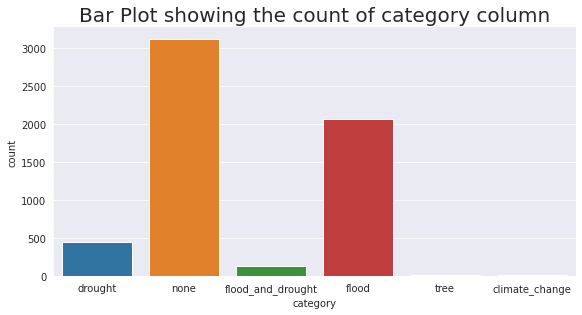

In [71]:
sns.set_style('darkgrid')
sns.catplot(x = "category",data = df, kind = "count",height=4,aspect=2)
plt.title('Bar Plot showing the count of category column', size = 20)

Text(0.5, 1.0, 'Bar Plot showing the count of data source column')

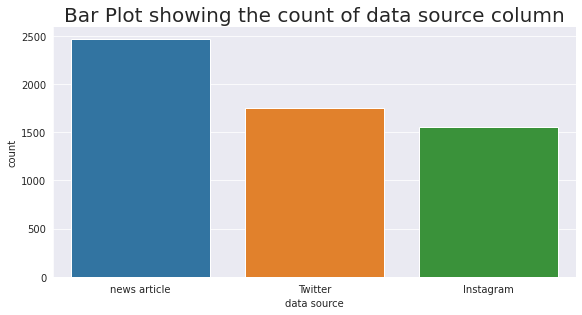

In [72]:
sns.set_style('darkgrid')
sns.catplot(x = "data source",data = df, kind = "count",height=4,aspect=2)
plt.title('Bar Plot showing the count of data source column', size = 20)

In [73]:
df['time'] = pd.to_datetime(df['time'])

df['Which Day'] = df['time'].dt.day_name()
df['Year'] = df['time'].dt.year
df['Month'] = (df['time'].dt.month_name())

In [74]:
df.dropna(subset=['Year', 'Month', 'Which Day'], how = 'any', inplace=True)

In [75]:
df.isnull().sum()

Id                0
title          3284
time              0
keywords       2135
data source       0
category          0
country        2511
source URL      602
body              0
language          5
Which Day         0
Year              0
Month             0
dtype: int64

In [76]:
df['Year'] = df['Year'].astype(int)

Text(0.5, 1.0, 'Frequecy showing which day has more data')

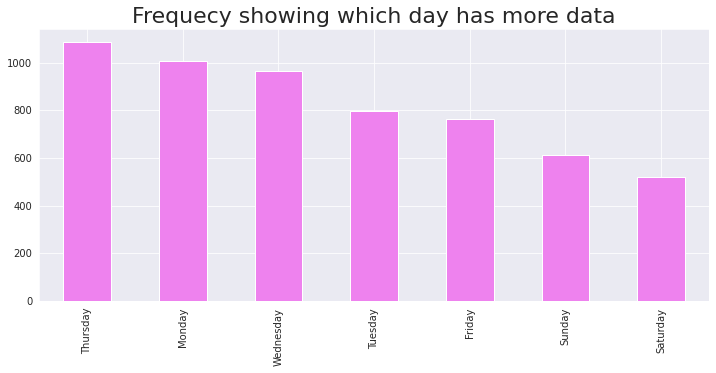

In [77]:
plt.figure(figsize = (12,5))
df['Which Day'].value_counts().plot(kind = 'bar', color = 'violet')
plt.title('Frequecy showing which day has more data', size = 22)

Text(0.5, 1.0, 'Frequecy showing which month has more data')

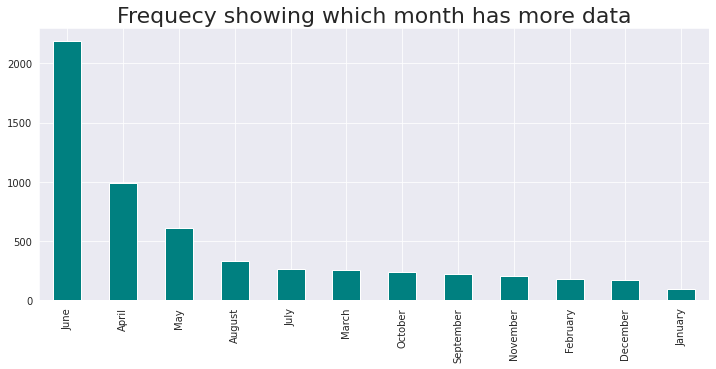

In [78]:
plt.figure(figsize = (12,5))
df['Month'].value_counts().plot(kind = 'bar', color = 'teal')
plt.title('Frequecy showing which month has more data', size = 22)

Text(0.5, 1.0, 'Frequecy showing which year has more data')

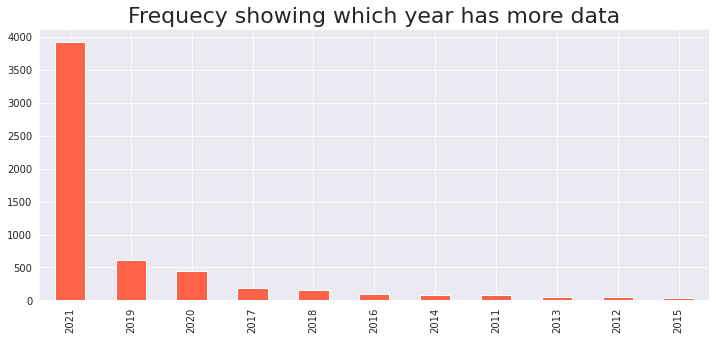

In [79]:
plt.figure(figsize = (12,5))
df['Year'].value_counts().plot(kind = 'bar', color = 'tomato')
plt.title('Frequecy showing which year has more data', size = 22)

# Word cloud for the category Flood

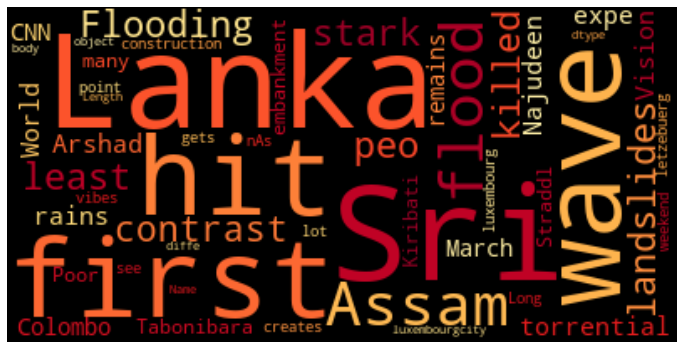

In [80]:
cloud=WordCloud(colormap="YlOrRd").generate(str(df[df['category'] == 'flood']["body"]))
fig=plt.figure(figsize=(12,18))
plt.axis("off")
plt.imshow(cloud,interpolation='bilinear')

# Word Cloud for the category Drought

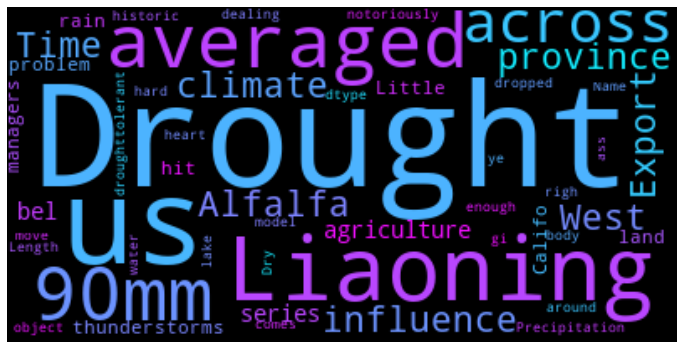

In [81]:
cloud=WordCloud(colormap="cool").generate(str(df[df['category'] == 'drought']["body"]))
fig=plt.figure(figsize=(12,18))
plt.axis("off")
plt.imshow(cloud,interpolation='bilinear')

# Word Cloud for the category None

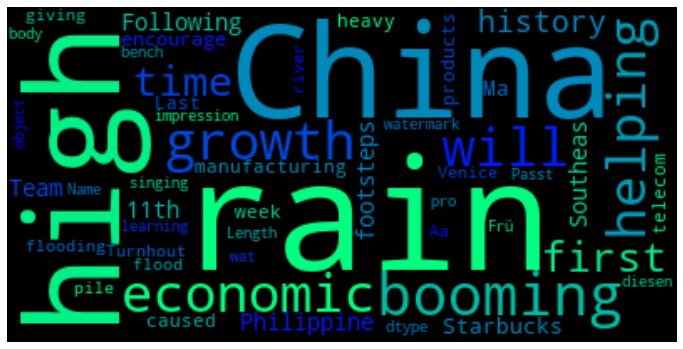

In [82]:
cloud=WordCloud(colormap="winter").generate(str(df[df['category'] == 'none']["body"]))
fig=plt.figure(figsize=(12,18))
plt.axis("off")
plt.imshow(cloud,interpolation='bilinear')

# Data extracted from twitter are from which year

Text(0.5, 1.0, 'Frequecy showing which year for twitter has more data')

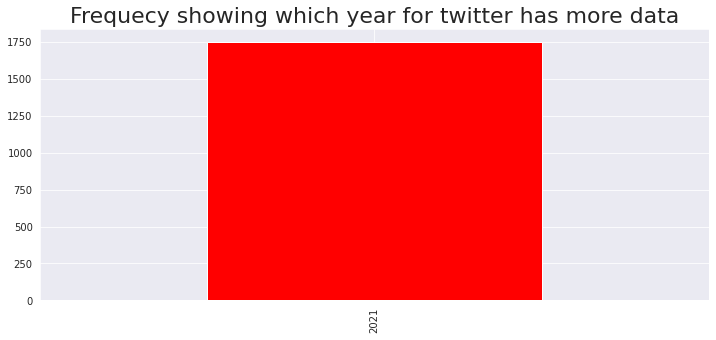

In [83]:
plt.figure(figsize = (12,5))
df[df['data source'] == 'Twitter']['Year'].value_counts().plot(kind = 'bar', color = 'red')
plt.title('Frequecy showing which year for twitter has more data', size = 22)

# Data extracted from Instagram are from which year

Text(0.5, 1.0, 'Frequecy showing which year for Instagram has more data')

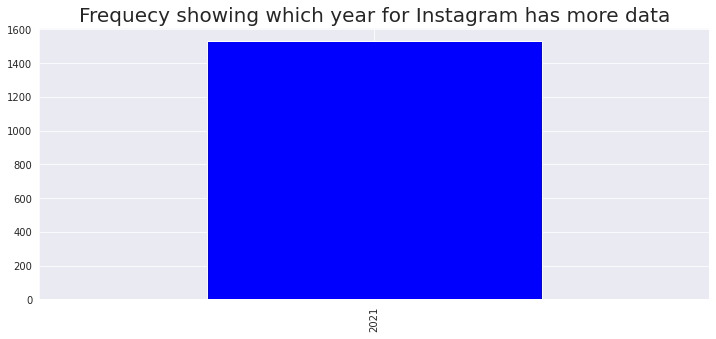

In [84]:
plt.figure(figsize = (12,5))
df[df['data source'] == 'Instagram']['Year'].value_counts().plot(kind = 'bar', color = 'blue')
plt.title('Frequecy showing which year for Instagram has more data', size = 20)

# Data extracted from News Articles are from which year

Text(0.5, 1.0, 'Frequecy showing which year for news articles has more data')

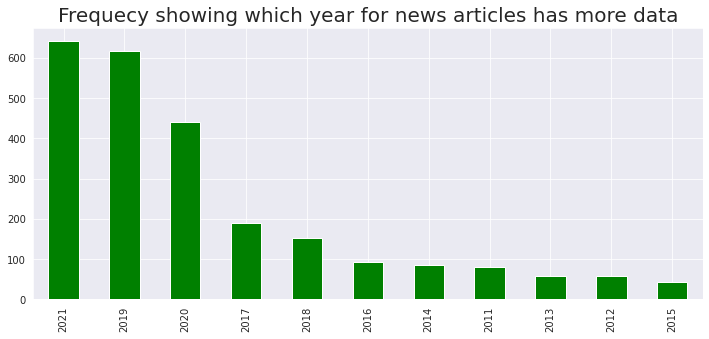

In [85]:
plt.figure(figsize = (12,5))
df[df['data source'] == 'news article']['Year'].value_counts().plot(kind = 'bar', color = 'green')
plt.title('Frequecy showing which year for news articles has more data', size = 20)

# How many from instagram data belongs to which category

Text(0.5, 1.0, 'Frequecy showing which year for Instagram has more data')

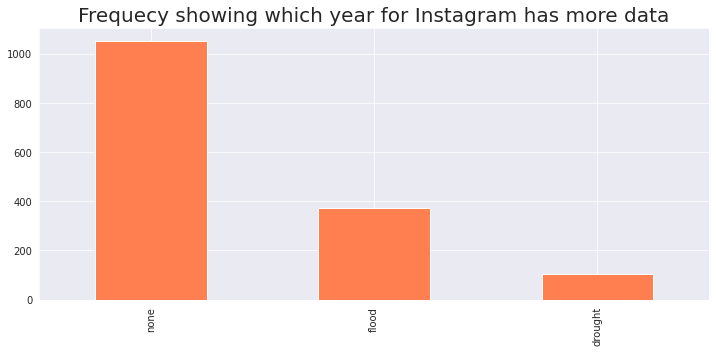

In [86]:
plt.figure(figsize = (12,5))
df[df['data source'] == 'Instagram']['category'].value_counts().plot(kind = 'bar', color = 'coral')
plt.title('Frequecy showing which year for Instagram has more data', size = 20)

# How many from Twitter data belongs to which category

Text(0.5, 1.0, 'Frequecy showing which year for Twitter has more data')

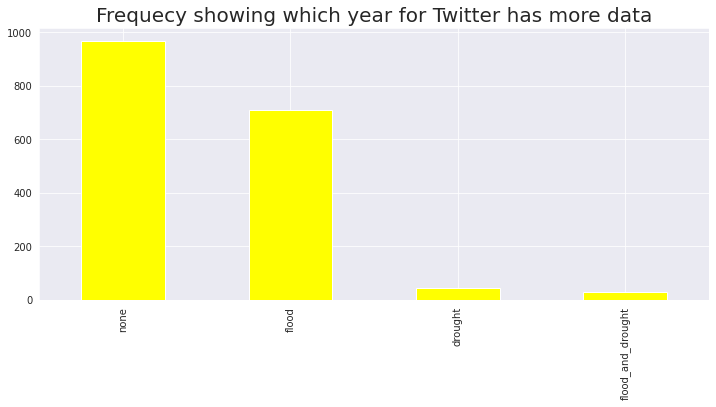

In [87]:
plt.figure(figsize = (12,5))
df[df['data source'] == 'Twitter']['category'].value_counts().plot(kind = 'bar', color = 'yellow')
plt.title('Frequecy showing which year for Twitter has more data', size = 20)

# How many from news article data belongs to which category

Text(0.5, 1.0, 'Frequecy showing which year for news article has more data')

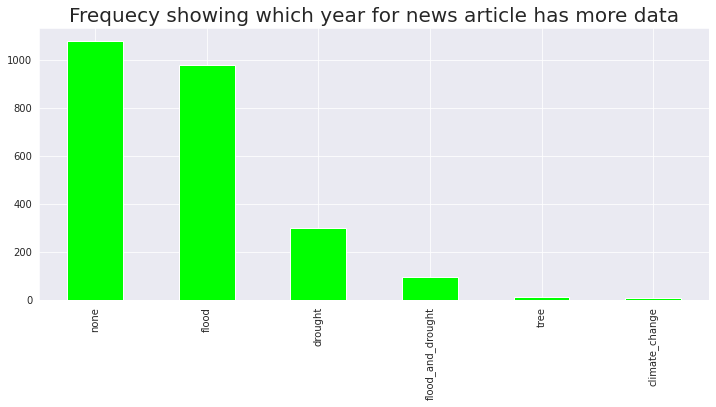

In [88]:
plt.figure(figsize = (12,5))
df[df['data source'] == 'news article']['category'].value_counts().plot(kind = 'bar', color = 'lime')
plt.title('Frequecy showing which year for news article has more data', size = 20)

# Word Cloud for column Keywords

In [89]:
mask = np.array(Image.open('/content/drive/MyDrive/germany-preview.jpg'))

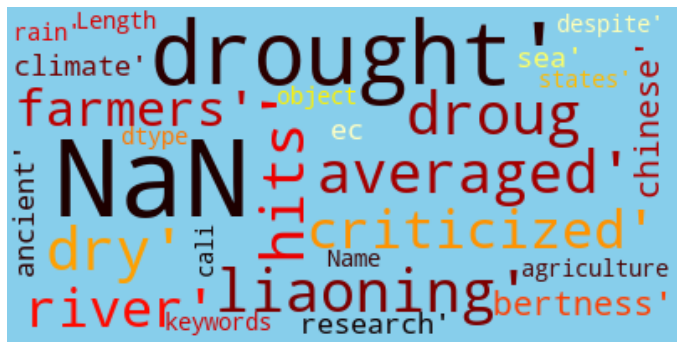

In [90]:
cloud=WordCloud(colormap='hot', background_color='skyblue').generate(str(df["keywords"]))
fig=plt.figure(figsize=(12,18))
plt.axis("off")
plt.imshow(cloud,interpolation='bilinear')

# Year wise giving frequency of Natural Calamities as per data

Text(0.5, 1.0, 'Year wise giving frequency of Natural Calamities as per data')

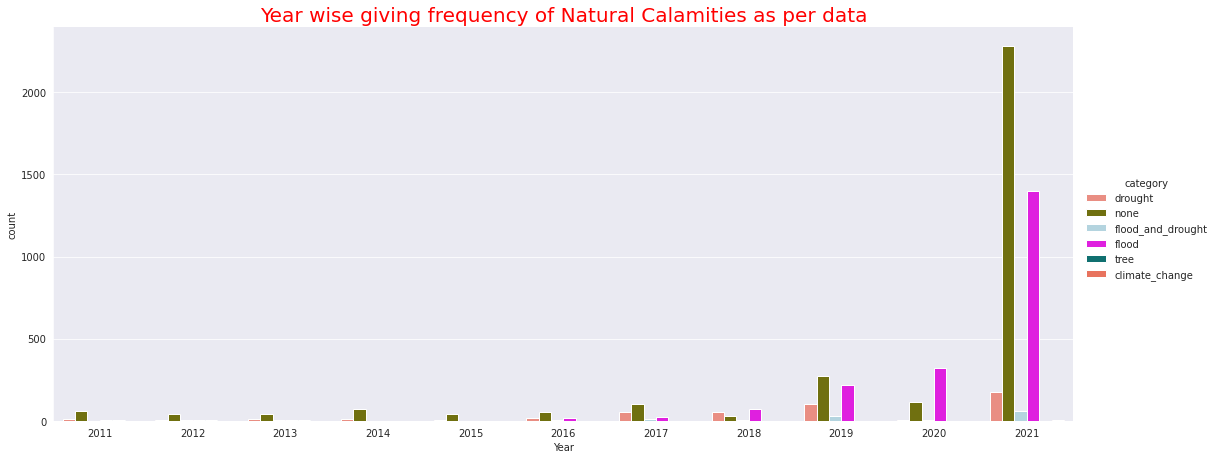

In [108]:
# # year = [i for i in range(2011, 2022)]
color = ['salmon', 'olive', 'lightblue', 'fuchsia', 'teal', 'tomato', 'lime', 'lavender', 'goldenrod', 'aqua', 'red']

sns.catplot(x = "Year",data = df, kind = "count",height=6,aspect=2.5, hue = 'category', palette=color)
plt.title('Year wise giving frequency of Natural Calamities as per data', size = 20, color = 'red')

# Year wise extracted data source count as per data

Text(0.5, 1.0, 'Year wise extracted data source count as per data')

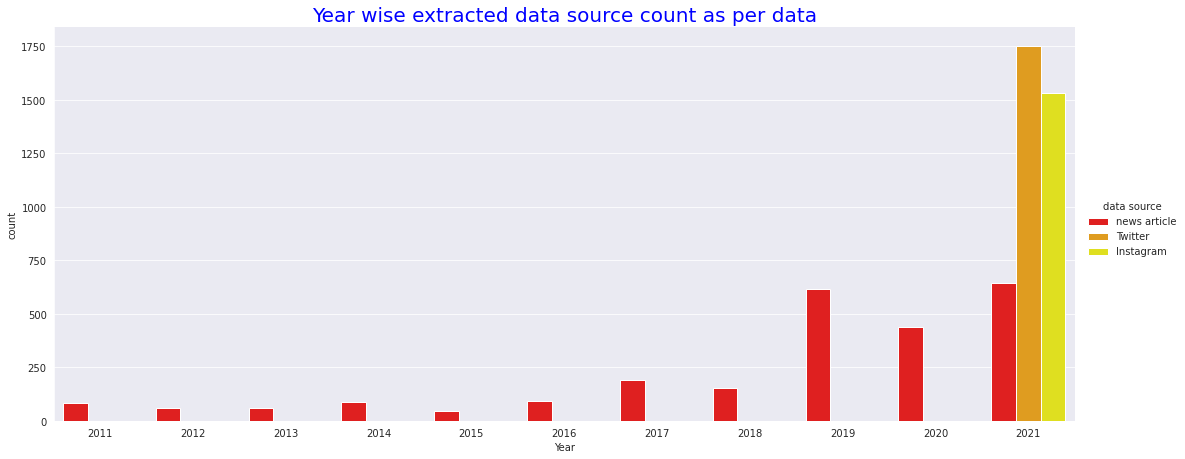

In [113]:
colors = ['red', 'orange', 'yellow']
sns.catplot(x = "Year",data = df, kind = "count",height=6,aspect=2.5, hue = 'data source', palette=colors)
plt.title('Year wise extracted data source count as per data', size = 20, color = 'blue')